In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.api import OLS, add_constant
import ISLP.models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# 交叉验证

## 概述

在此笔记本中，您将深入了解多元线性回归的基本原理和实践，使用Python完成以下内容：

## 加载示例数据

我们将使用教材《An Introduction to Statistical Learning》中提到的 `Auto` 数据集。该数据集最初来源于1970年代末由美国环境保护署（EPA）进行的一项研究。该数据集最初用于燃油经济性和车辆排放研究，成为了了解那个时期汽车性能特征的重要资源。

### Auto 数据集 - 列描述

| 列名            | 描述                                                                                      |
|----------------|-----------------------------------------------------------------------------------------|
| `mpg`          | **每加仑英里数** - 汽车的燃油效率（值越高越好）                                              |
| `cylinders`    | **气缸数** - 汽车发动机的气缸数量（通常在3到8之间）                                           |
| `displacement` | **发动机排量** - 发动机的排量（以立方英寸计量），表示发动机的大小                                 |
| `horsepower`   | **马力** - 汽车发动机的功率输出（以HP为单位）                                                 |
| `weight`       | **重量** - 汽车的重量（以磅为单位）                                                          |
| `acceleration` | **加速度** - 汽车从0到60英里/小时的加速时间（以秒为单位）                                      |
| `year`         | **车型年份** - 汽车的制造年份（如1970年、1982年）                                            |
| `origin`       | **产地** - 用1（美国）、2（欧洲）和3（日本）表示                                               |
| `name`         | **汽车名称** - 汽车的品牌和型号（文本标签）                                                   |

### 注意事项：
- 某些字段（如 `horsepower`）可能包含缺失值。
- `origin` 字段表示分类数据，1代表美国，2代表欧洲，3代表日本。

In [10]:
data_auto = ISLP.load_data("Auto")
print(data_auto)

                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   
...                         ...        ...           ...         ...     ...   
ford mustang gl            27.0          4         140.0          86    2790   
vw pickup                  44.0          4          97.0          52    2130   
dodge rampage              32.0          4         135.0          84    2295   
ford ranger                28.0          4         120.0          79    2625   
chevy s-10                 31.0         

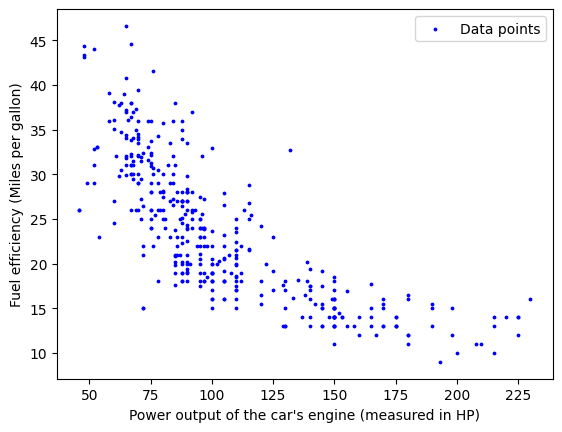

In [11]:
data_auto = data_auto.sort_values(by="horsepower")
horsepower = data_auto["horsepower"]
mpg = data_auto["mpg"]

plt.scatter(
    horsepower,
    mpg,
    s=3,
    c="b",
    label="Data points",
)
plt.xlabel("Power output of the car's engine (measured in HP)")
plt.ylabel("Fuel efficiency (Miles per gallon)")
plt.legend()
plt.show()

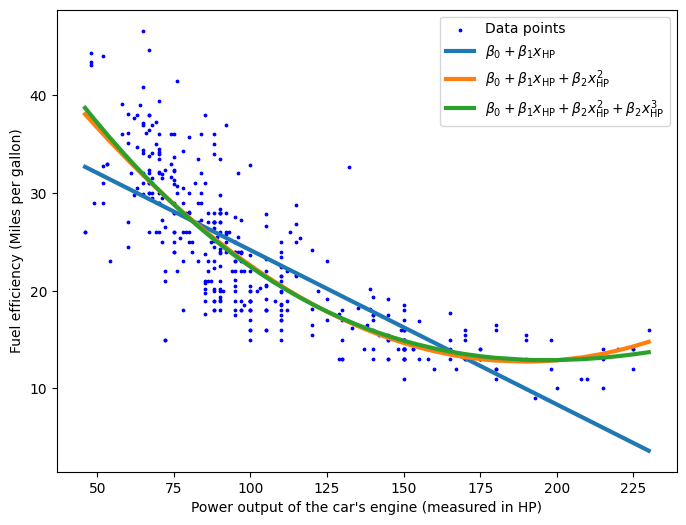

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

ax.scatter(horsepower, mpg, s=3, c="b", label="Data points")
ax.set_xlabel("Power output of the car's engine (measured in HP)")
ax.set_ylabel("Fuel efficiency (Miles per gallon)")

horsepower = data_auto[["horsepower"]]

degree = 1
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(horsepower)
model = OLS(mpg, x_poly).fit()
y_pred = model.predict(x_poly)
ax.plot(horsepower, y_pred, lw=3, label=r"$\beta_0 + \beta_1x_\text{HP}$")

degree = 2
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(horsepower)
model = OLS(mpg, x_poly).fit()
y_pred = model.predict(x_poly)
ax.plot(
    horsepower,
    y_pred,
    lw=3,
    label=r"$\beta_0 + \beta_1x_\text{HP} + \beta_2x_\text{HP}^2$",
)

degree = 3
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(horsepower)
model = OLS(mpg, x_poly).fit()
y_pred = model.predict(x_poly)
ax.plot(
    horsepower,
    y_pred,
    lw=3,
    label=r"$\beta_0 + \beta_1x_\text{HP} + \beta_2x_\text{HP}^2 + \beta_2x_\text{HP}^3$",
)

ax.legend()
plt.show()

### 哪种拟合更好？

平方（二次）和立方（三次）模型的结果相似。

- 哪一个效果更好？
- 更高次的多项式表现如何？

我们可以通过将数据分成两部分，一部分用于测试，另一部分用于验证，以此来验证我们的选择。我们将使用均方误差（MSE）来判断哪个多项式阶数更能解释数据。

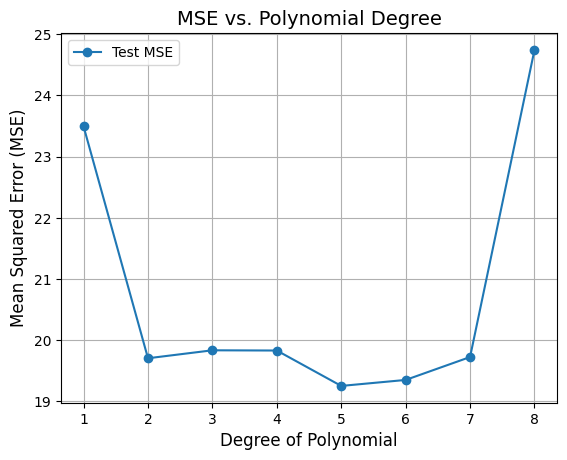

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    data_auto[["horsepower"]], data_auto["mpg"], test_size=0.5, random_state=0
)
max_degree = 8
degrees = list(range(1, max_degree + 1))
mse_list = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)

    model = OLS(y_train, x_train_poly).fit()

    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_list.append(mse_test)
plt.plot(np.arange(1, max_degree + 1), mse_list, label=f"Test MSE", marker="o")
plt.xlabel("Degree of Polynomial", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("MSE vs. Polynomial Degree", fontsize=14)
plt.xticks(degrees)  # Ensures all degrees are labeled on x-axis
plt.legend()
plt.grid(True)
plt.show()

均方误差（MSE）结果对测试组和训练组中选取的观测数据较为敏感。为了展示这一点，我们将更改 `train_test_split()` 函数中的 `random_state` 变量，并使用不同的随机数生成器种子重复前一单元格中的计算。

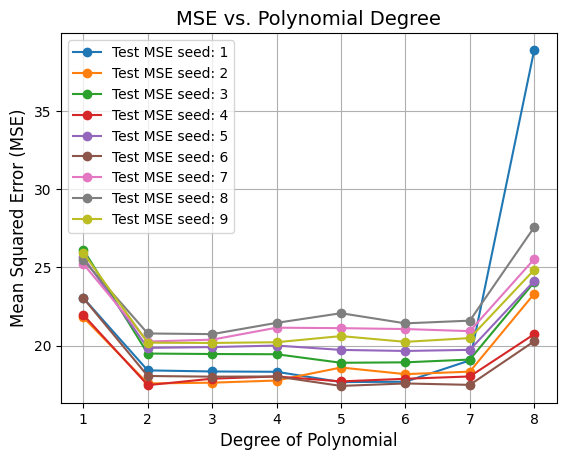

In [14]:
max_degree = 8
degrees = list(range(1, max_degree + 1))

for seed in range(1, 10):
    x_train, x_test, y_train, y_test = train_test_split(
        data_auto[["horsepower"]], data_auto["mpg"], test_size=0.5, random_state=seed
    )

    mse_list = []
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)

        model = OLS(y_train, x_train_poly).fit()

        y_train_pred = model.predict(x_train_poly)
        y_test_pred = model.predict(x_test_poly)

        mse_test = mean_squared_error(y_test, y_test_pred)
        mse_list.append(mse_test)
    plt.plot(degrees, mse_list, marker="o", label=f"Test MSE seed: {seed}")

plt.xlabel("Degree of Polynomial", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("MSE vs. Polynomial Degree", fontsize=14)
plt.xticks(degrees)
plt.legend()
plt.grid(True)

### k折交叉验证

由于均方误差（MSE）的结果会随所选的训练集而变化，我们可以使用k折交叉验证（k-fold cross-validation）来平滑这一影响。具体做法是将数据随机分成k组（folds），每组大小大致相等。然后我们对模型进行k次拟合，每次使用其中一个fold作为验证集，剩下的k-1个fold用于模型训练。最终，我们会得到k个MSE的估计值。取其平均值并报告为k折交叉验证的估计值。

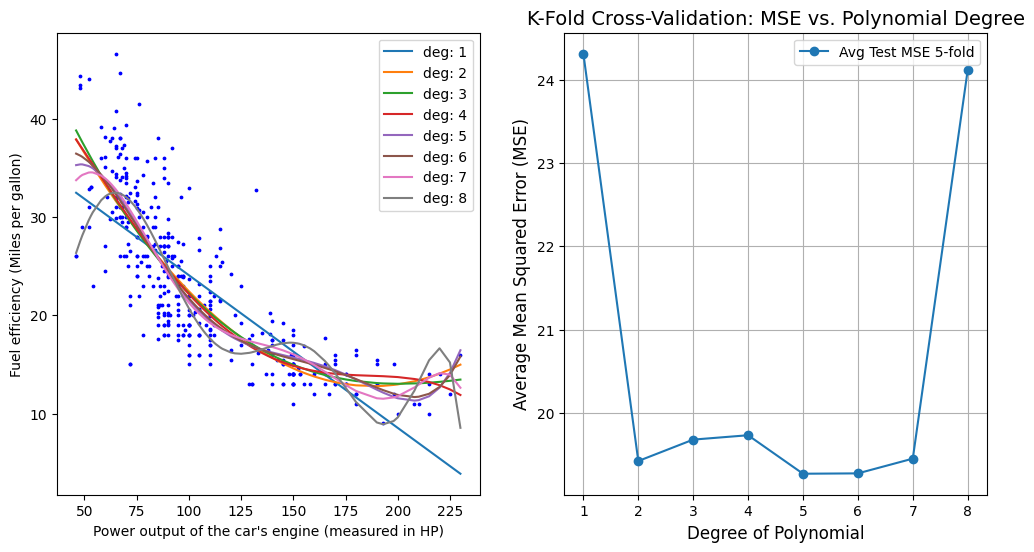

In [15]:
horsepower = data_auto[["horsepower"]]
mpg = data_auto["mpg"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].scatter(horsepower, mpg, c="b", s=3)
ax[0].set_xlabel("Power output of the car's engine (measured in HP)")
ax[0].set_ylabel("Fuel efficiency (Miles per gallon)")

num_of_folds = 5
k_fold = KFold(n_splits=num_of_folds, shuffle=True, random_state=0)

max_degree = 8
degrees = list(range(1, max_degree + 1))

avg_test_mse_list = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)

    test_mse_list = []
    for train_index, test_index in k_fold.split(horsepower):
        x_train, x_test = horsepower.iloc[train_index], horsepower.iloc[test_index]
        y_train, y_test = mpg.iloc[train_index], mpg.iloc[test_index]

        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)

        model = OLS(y_train, x_train_poly).fit()
        y_test_pred = model.predict(x_test_poly)

        mse_test = mean_squared_error(y_test, y_test_pred)
        test_mse_list.append(mse_test)

    avg_test_mse_list.append(np.mean(test_mse_list))
    horsepower_transformed = poly.fit_transform(horsepower)
    y_pred = model.predict(horsepower_transformed)
    ax[0].plot(horsepower, y_pred, label=f"deg: {degree}")

ax[1].plot(
    degrees, avg_test_mse_list, label=f"Avg Test MSE {num_of_folds}-fold", marker="o"
)
ax[1].set_xlabel("Degree of Polynomial", fontsize=12)
ax[1].set_ylabel("Average Mean Squared Error (MSE)", fontsize=12)
ax[1].set_title("K-Fold Cross-Validation: MSE vs. Polynomial Degree", fontsize=14)
ax[1].set_xticks(degrees)
ax[1].legend()
ax[1].grid(True)
ax[0].legend()

plt.show()

### k折交叉验证中的k值

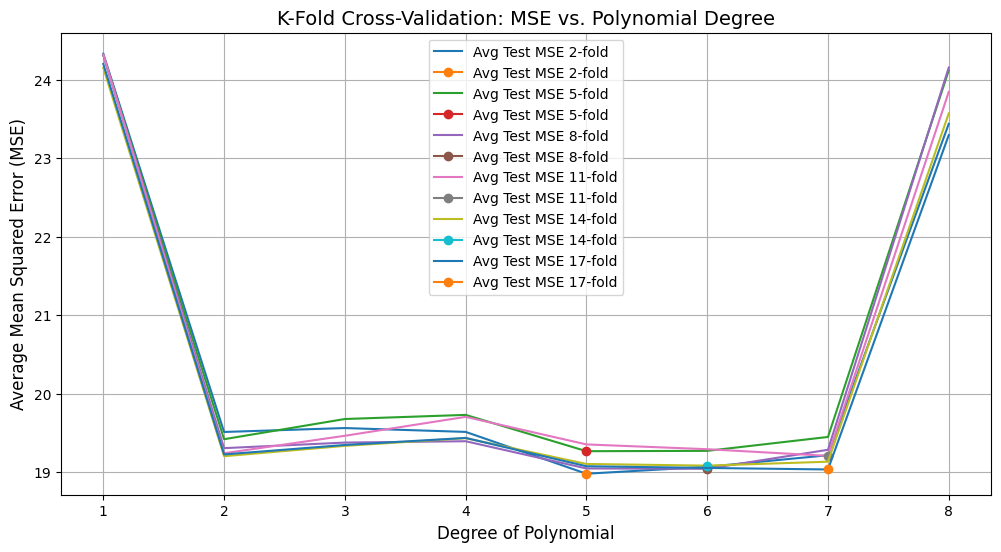

In [16]:
horsepower = data_auto[["horsepower"]]
mpg = data_auto["mpg"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
degrees = np.asarray(degrees)

for num_of_folds in range(2, 20, 3):
    k_fold = KFold(n_splits=num_of_folds, shuffle=True, random_state=0)

    avg_test_mse_list = []
    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)

        test_mse_list = []
        for train_index, test_index in k_fold.split(horsepower):
            x_train, x_test = horsepower.iloc[train_index], horsepower.iloc[test_index]
            y_train, y_test = mpg.iloc[train_index], mpg.iloc[test_index]

            x_train_poly = poly.fit_transform(x_train)
            x_test_poly = poly.transform(x_test)

            model = OLS(y_train, x_train_poly).fit()
            y_test_pred = model.predict(x_test_poly)

            mse_test = mean_squared_error(y_test, y_test_pred)
            test_mse_list.append(mse_test)

        avg_test_mse_list.append(np.mean(test_mse_list))
        horsepower_transformed = poly.fit_transform(horsepower)
        y_pred = model.predict(horsepower_transformed)
        # ax[0].plot(horsepower, y_pred, label =f"deg: {degree}")
    avg_test_mse_list = np.asarray(avg_test_mse_list)
    min_val = min(avg_test_mse_list)
    ax.plot(degrees, avg_test_mse_list, label=f"Avg Test MSE {num_of_folds}-fold")
    ax.plot(
        degrees[avg_test_mse_list == min_val],
        avg_test_mse_list[avg_test_mse_list == min_val],
        label=f"Avg Test MSE {num_of_folds}-fold",
        marker="o",
    )

ax.set_xlabel("Degree of Polynomial", fontsize=12)
ax.set_ylabel("Average Mean Squared Error (MSE)", fontsize=12)
ax.set_title("K-Fold Cross-Validation: MSE vs. Polynomial Degree", fontsize=14)
ax.set_xticks(degrees)
ax.legend()
ax.grid(True)

plt.show()